# Project Title: Road Sign Recignition
### Project discription: We use Belgium database for training and validation of our model. 


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dense, Dropout, Activation, Flatten

/home/efka/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)
training_set = train_data.flow_from_directory('Training',target_size = (64, 64),color_mode='rgb',class_mode = 'categorical')
test_set = test_data.flow_from_directory('Testing',target_size = (64, 64),color_mode='rgb',class_mode = 'categorical')

Found 4539 images belonging to 62 classes.
Found 2433 images belonging to 62 classes.


In [82]:
print(len(training_set.filenames))
indices = training_set.class_indices
print(indices) 
print(len(training_set.class_indices))

4539
{'00039': 39, '00051': 51, '00028': 28, '00061': 61, '00036': 36, '00004': 4, '00017': 17, '00011': 11, '00007': 7, '00021': 21, '00038': 38, '00025': 25, '00010': 10, '00012': 12, '00013': 13, '00045': 45, '00058': 58, '00059': 59, '00060': 60, '00003': 3, '00018': 18, '00026': 26, '00002': 2, '00053': 53, '00057': 57, '00008': 8, '00056': 56, '00029': 29, '00014': 14, '00022': 22, '00050': 50, '00041': 41, '00040': 40, '00006': 6, '00015': 15, '00027': 27, '00019': 19, '00052': 52, '00031': 31, '00009': 9, '00042': 42, '00020': 20, '00016': 16, '00046': 46, '00044': 44, '00034': 34, '00030': 30, '00033': 33, '00049': 49, '00054': 54, '00047': 47, '00032': 32, '00035': 35, '00000': 0, '00024': 24, '00001': 1, '00005': 5, '00023': 23, '00043': 43, '00055': 55, '00048': 48, '00037': 37}
62


In [19]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten(input_shape=classifier.output_shape[1:]))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(62, activation='softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
print(type(training_set[0][1]))
print(len(training_set[0][1]))
print(training_set[0][1][0])

<class 'numpy.ndarray'>
32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


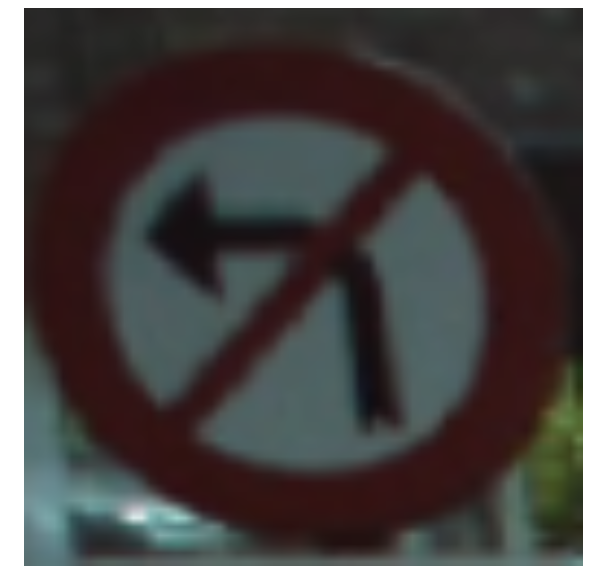

In [8]:
fig = plt.figure(figsize = (10,10))

plt.imshow(training_set[8][1][0])
plt.axis('off')
    
plt.show()

In [21]:
classifier.fit_generator(training_set,steps_per_epoch = 4539,epochs = 20,validation_data = test_set,validation_steps = 2433)

Epoch 1/20
   2/4539 [..............................] - ETA: 11:27:53 - loss: 4.1569 - acc: 0.0156    

/home/efka/.local/lib/python3.5/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (1.583872). Check your callbacks.
  % delta_t_median)


4539/4539 [==============================] - 1890s 416ms/step - loss: 0.2848 - acc: 0.9209 - val_loss: 0.1245 - val_acc: 0.9725
Epoch 2/20
4539/4539 [==============================] - 1301s 287ms/step - loss: 0.0553 - acc: 0.9822 - val_loss: 0.1203 - val_acc: 0.9790
Epoch 3/20
4539/4539 [==============================] - 1308s 288ms/step - loss: 0.0362 - acc: 0.9884 - val_loss: 0.1423 - val_acc: 0.9774
Epoch 4/20
4539/4539 [==============================] - 1301s 287ms/step - loss: 0.0246 - acc: 0.9923 - val_loss: 0.1582 - val_acc: 0.9766
Epoch 5/20
4539/4539 [==============================] - 1286s 283ms/step - loss: 0.0228 - acc: 0.9930 - val_loss: 0.1390 - val_acc: 0.9823
Epoch 6/20
4539/4539 [==============================] - 1277s 281ms/step - loss: 0.0200 - acc: 0.9940 - val_loss: 0.1328 - val_acc: 0.9820
Epoch 7/20
4539/4539 [==============================] - 1284s 283ms/step - loss: 0.0167 - acc: 0.9952 - val_loss: 0.1548 - val_acc: 0.9815
Epoch 8/20
4539/4539 [================

In [22]:
classifier.save('my_classifier.h5')

In [4]:
from keras.models import load_model
model = load_model('my_classifier.h5')

In [116]:
from keras.preprocessing import image
test_image = image.load_img('E3.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)

In [117]:
result = model.predict(test_image)
print(result)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [63]:
imgs, labels = next(training_set)


In [64]:
print(labels.shape)


(32, 62)


In [67]:
index = 0
for i in labels:
    if np.array_equal(i, result[0]):
        print(i)
        print(index)
    index += 1


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
27
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
29


The example of properly recogniesed picture

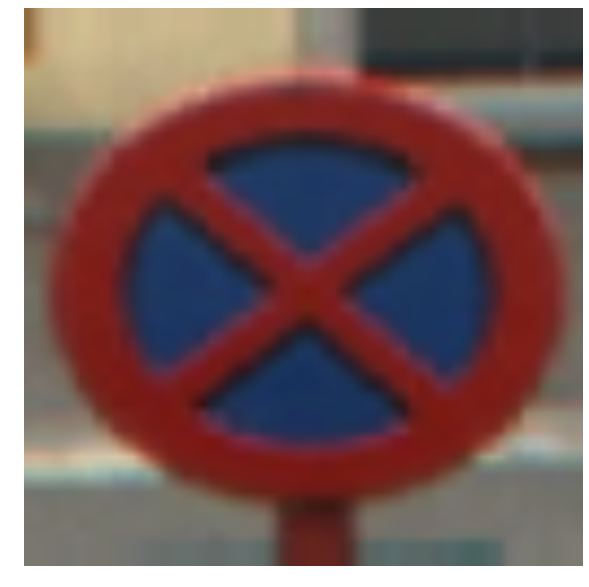

In [68]:
fig = plt.figure(figsize = (10,10))
plt.imshow(imgs[27])
plt.axis('off')
plt.show()

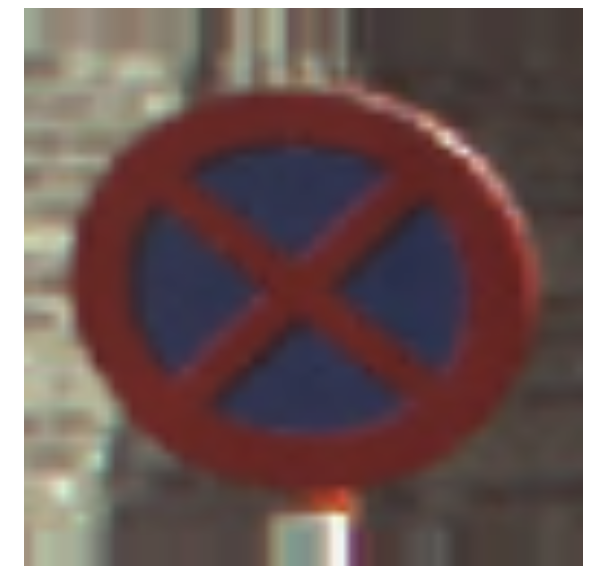

In [70]:
fig = plt.figure(figsize = (10,10))
plt.imshow(imgs[29])
plt.axis('off')
plt.show()

In [130]:
from keras.preprocessing import image
test_image = image.load_img('A1A.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [131]:
result = model.predict(test_image)
print(result)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [100]:
test_set = test_data.flow_from_directory('Testing',target_size = (64, 64),color_mode='rgb',batch_size = 100,class_mode = 'categorical')

Found 2433 images belonging to 62 classes.


In [136]:
imgs, labels = next(test_set)
index = 0
for i in labels:
    if np.array_equal(i, result[0]):
        print(i)
        print(index)
    index += 1

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0


In [125]:
print(labels.shape)

(100, 62)


The example of unproperly recogniesed picture

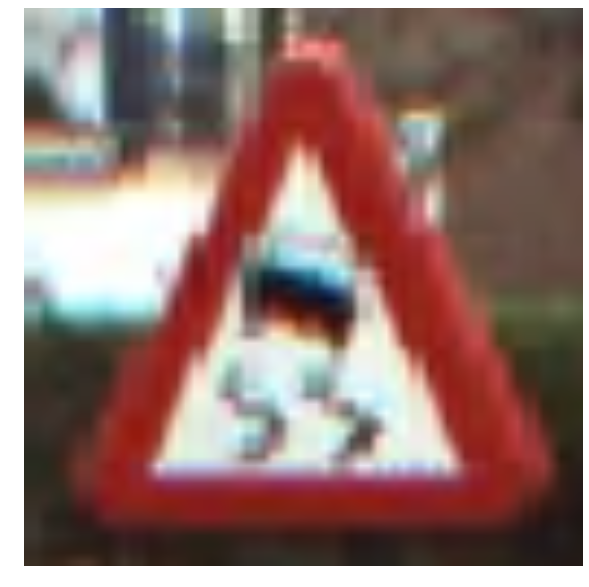

In [137]:
fig = plt.figure(figsize = (10,10))
plt.imshow(imgs[0])
plt.axis('off')
plt.show()

The test image is:


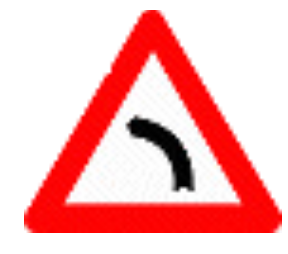

In [59]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
image = load_img('A1A.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
from keras.utils.np_utils import to_categorical
num_classes = len(test_set.class_indices)
test_labels = test_set.classes
print(test_set.class_indices)
test_labels = to_categorical(test_labels, num_classes=num_classes)
print(len(test_labels))
print(test_labels[455])

{'00009': 9, '00020': 20, '00034': 34, '00019': 19, '00015': 15, '00003': 3, '00024': 24, '00059': 59, '00013': 13, '00030': 30, '00058': 58, '00017': 17, '00039': 39, '00061': 61, '00002': 2, '00033': 33, '00011': 11, '00026': 26, '00044': 44, '00041': 41, '00010': 10, '00006': 6, '00021': 21, '00000': 0, '00054': 54, '00050': 50, '00028': 28, '00025': 25, '00007': 7, '00031': 31, '00060': 60, '00046': 46, '00018': 18, '00055': 55, '00048': 48, '00045': 45, '00051': 51, '00032': 32, '00057': 57, '00047': 47, '00001': 1, '00036': 36, '00037': 37, '00004': 4, '00035': 35, '00029': 29, '00016': 16, '00023': 23, '00043': 43, '00008': 8, '00040': 40, '00012': 12, '00022': 22, '00052': 52, '00049': 49, '00005': 5, '00056': 56, '00014': 14, '00027': 27, '00053': 53, '00038': 38, '00042': 42}
2433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
import os
from keras.preprocessing import image

list_of_classes = os.listdir("Testing")
print(list_of_classes)
list_of_classes.remove('Readme.txt')
L_listing = []
num_samples = 0
for i in list_of_classes:
    if "txt" not in i: 
        listing = os.listdir("Testing"+'/'+i)
        num_samples += len(listing)
        L_listing.append(listing)
        
y_test = []    
img_test = []
i = 0
for listing in L_listing:
    for file in listing:
        if("csv" not in file):
            test_image = image.load_img("Testing" + '/' + list_of_classes[i] + '/' +  file, target_size = (64, 64))
            test_image = image.img_to_array(test_image) 
            test_image = test_image/255.
            img_test.append(test_image)
            y_test.append(list_of_classes[i]) 
    i += 1   
Y_test = y_test
y_test = to_categorical(y_test, num_classes=num_classes)
print(y_test[455])

X_test = np.array(img_test)
y_test = np.array(y_test)


['00050', '00016', '00027', '00025', '00035', '00034', '00014', '00056', '00060', '00038', '00023', '00033', '00015', '00032', '00007', '00051', '00054', 'Readme.txt', '00048', '00045', '00031', '00026', '00005', '00018', '00043', '00012', '00047', '00013', '00059', '00028', '00019', '00061', '00037', '00029', '00052', '00003', '00011', '00000', '00020', '00004', '00008', '00036', '00046', '00017', '00041', '00002', '00055', '00001', '00049', '00044', '00039', '00022', '00058', '00024', '00006', '00042', '00053', '00040', '00010', '00030', '00021', '00009', '00057']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
y_pred =  model.predict(X_test)
acc = np.sum(y_pred==y_test)/np.size(y_pred)
print("Test accuracy = {}".format(acc))

Test accuracy = 0.7914429285496467


In [81]:
 (eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size=32, verbose=1)

2433/2433 [==============================] - 6s 3ms/step


In [86]:
print(eval_loss)
print(eval_accuracy)


0.1970960439960539
0.9790382244143033


In [9]:
print(y_test[10], " ", y_pred[10])
for i in range(len(y_test)): 
    y_pred[i] = y_pred[i].astype(int)
    y_test[i] = y_test[i].astype(int)
print(y_test[5], " ", y_pred[5])
print("length of y_test: ", len(y_test), " length of y_pred: ", len(y_pred) )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   [2.0570168e-34 6.0028805e-29 1.5579146e-20 9.3777021e-03 2.5745795e-13
 5.8005897e-31 3.7430843e-24 9.7247692e-15 2.0397342e-10 0.0000000e+00
 1.4904480e-16 3.4061433e-23 8.9373809e-28 2.7486965e-14 5.4382570e-05
 1.2007485e-13 9.9056786e-01 3.7804460e-27 5.8461630e-27 1.6113466e-27
 1.4320549e-38 5.0226174e-23 5.6307839e-20 1.0974800e-37 0.0000000e+00
 1.0359228e-37 0.0000000e+00 0.0000000e+00 1.9741173e-22 1.5723433e-37
 3.5597156e-34 0.0000000e+00 2.6602223e-26 0.0000000e+00 2.3776555e-29
 2.5102024e-37 0.0000000e+00 0.0000000e+00 4.5840104e-30 1.0339644e-30
 7.7932945e-22 2.3414083e-30 7.5884115e-36 2.9959904e-35 6.5016675e-28
 2.7745549e-32 0.0000000e+00 1.0483979e-37 6.7457948e-37 2.7317569e-33
 0.0000000e+00 3.0904661e-29 1.9371480e-35 6.4800301e-27 1.6999304e-18
 4.7431106e-37 3.8232074e-2

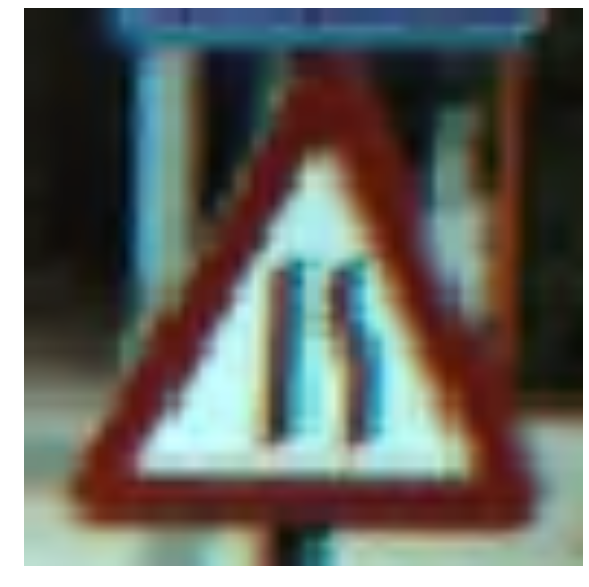

In [10]:
fig = plt.figure(figsize = (10,10))

plt.imshow(X_test[10])
plt.axis('off')
    
plt.show()

In [11]:
dict_class = {}
for i in list_of_classes:
    dict_class[i] = to_categorical(i, num_classes=62)
print(type(y_pred[0][0]))

<class 'numpy.float32'>


In [23]:
y_test_new = []
for i in y_test:
    for key in dict_class.keys():
        if np.array_equal(dict_class[key],i):
            y_test_new.append(key)
  
zong = []
y_pred_new = []
for i in y_pred:
    br = True
    for key in dict_class.keys():
        if np.array_equal(dict_class[key],i):
            y_pred_new.append(key)
            br = False
            break
    if(br) : 
        zong.append(i)
        y_pred_new.append('00000')
print("length of y_test_new: ", len(y_test_new), " length of y_pred_new: ", len(y_pred_new) )

length of y_test_new:  2433  length of y_pred_new:  2433


In [24]:
for key in dict_class.keys():
        if np.array_equal(dict_class[key],y_test[10]):
            print(key)
            break

00016


There is a problem with values: I got arrays with no 1, so that array can't be clasified. I assign those values with 00009 in loop above. I choosen this value, because in Testing file labeled as 00009 is any picture.


In [25]:
print(zong)
y_test_zong = []
for i in zong:
    for key in dict_class.keys():
        if np.array_equal(dict_class[key],i):
            y_test_zong.append(key)
print(len(y_test_zong))

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]


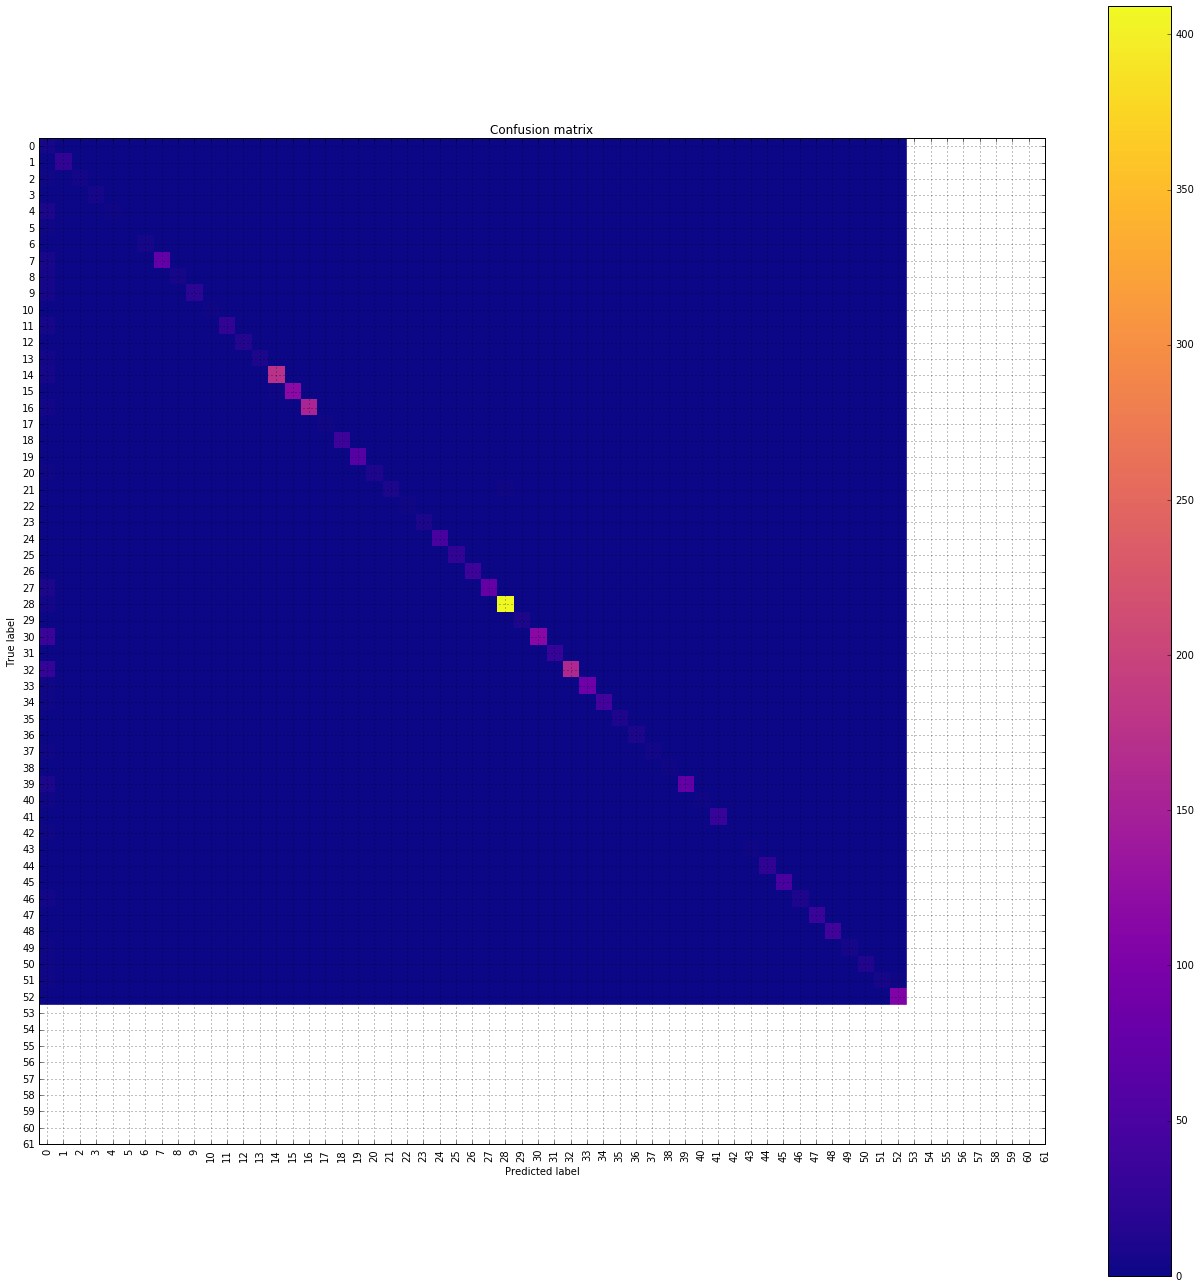

In [22]:
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize = (18,18))
conf = confusion_matrix(y_test_new, y_pred_new)
plt.imshow(conf, interpolation='nearest', cmap='plasma')
plt.title('Confusion matrix')
plt.colorbar()
listt = np.linspace(0,62,63,dtype=int)
print(listt)
tick_marks = np.arange(62)
plt.xticks(tick_marks, listt, rotation=90)
plt.yticks(tick_marks, listt)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()
plt.show()
